In [ ]:
!pip install statsmodels==0.12.1

     |████████████████████████████████| 9.5MB 8.3MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import os
import sys

import pandas_datareader.data as web
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from dateutil import parser
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse


In [ ]:
# files = sorted(['elecequip.csv', 'uschange.csv', 'sunspotarea.csv', 'a10.csv', 'wmurders.csv', 'livestock.csv', 'elecsales.csv', 'austourists.csv', 'maxtemp.csv', 'ausair.csv', 'qcement.csv', 'elecdaily.csv', 'elecdemand.csv', 'melsyd.csv', 'insurance.csv', 'qauselec.csv', 'prison.csv', 'arrivals.csv', 'ausbeer.csv', 'guinearice.csv', 'h02.csv', 'debitcards.csv', 'calls.csv', 'goog200.csv', 'usmelec.csv', 'milk.csv', 'marathon.csv', 'goog.csv', 'auscafe.csv', 'elec.csv', 'euretail.csv', 'hyndsight.csv', 'visnights.csv', 'mens400.csv', 'departures.csv', 'oil.csv', 'gasoline.csv', 'qgas.csv', 'austa.csv'])
# print(files)

In [ ]:

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv" 
df = pd.read_csv(url)


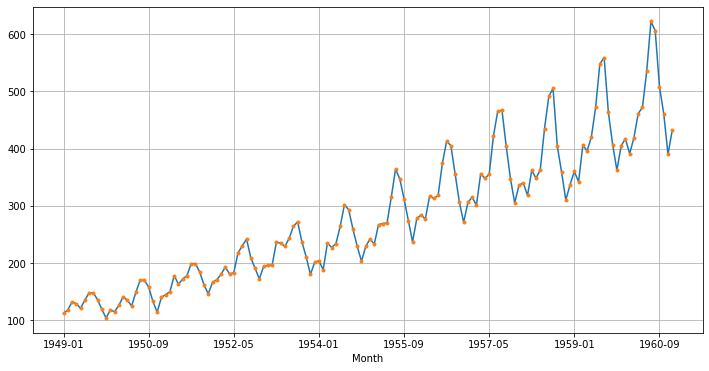

In [ ]:
# df['date'] = df['index'].apply(lambda d : parser.parse(d))

ts = pd.Series(data = df['Passengers'].values, index = df['Month'])

ts = ts[~ts.isna()]
ts.plot(figsize= (12,6), grid = True)
plt.plot(ts.index, ts.values, '.')

In [ ]:
from statsmodels.tsa.seasonal import STL


# decomposer avec statsmodel seasonal_decompose()


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(ts, model='additive', period =12)

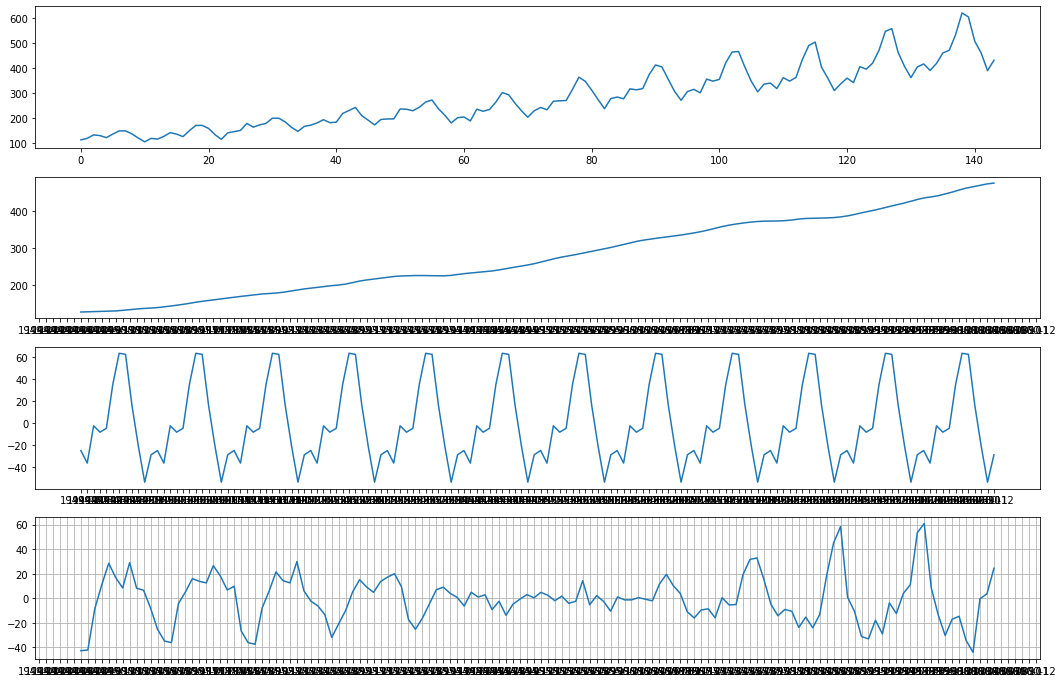

In [ ]:
fig, ax = plt.subplots(4,1, figsize = (18,12))
plt.subplot(4,1,1)
plt.plot(ts.values)
plt.subplot(4,1,2)
plt.plot(result.trend)
plt.subplot(4,1,3)
plt.plot(result.seasonal)
plt.subplot(4,1,4)
plt.plot(result.resid)
plt.grid()

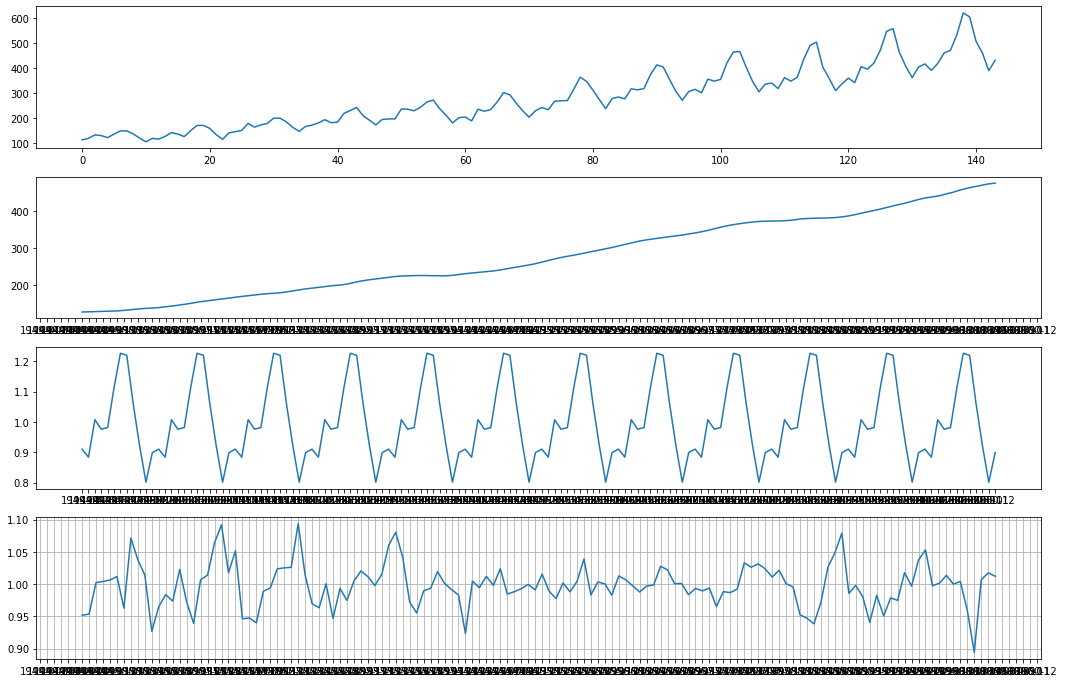

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(ts, model='multiplicative', period =12)

fig, ax = plt.subplots(4,1, figsize = (18,12))
plt.subplot(4,1,1)
plt.plot(ts.values)
plt.subplot(4,1,2)
plt.plot(result.trend)
plt.subplot(4,1,3)
plt.plot(result.seasonal)
plt.subplot(4,1,4)
plt.plot(result.resid)
plt.grid()

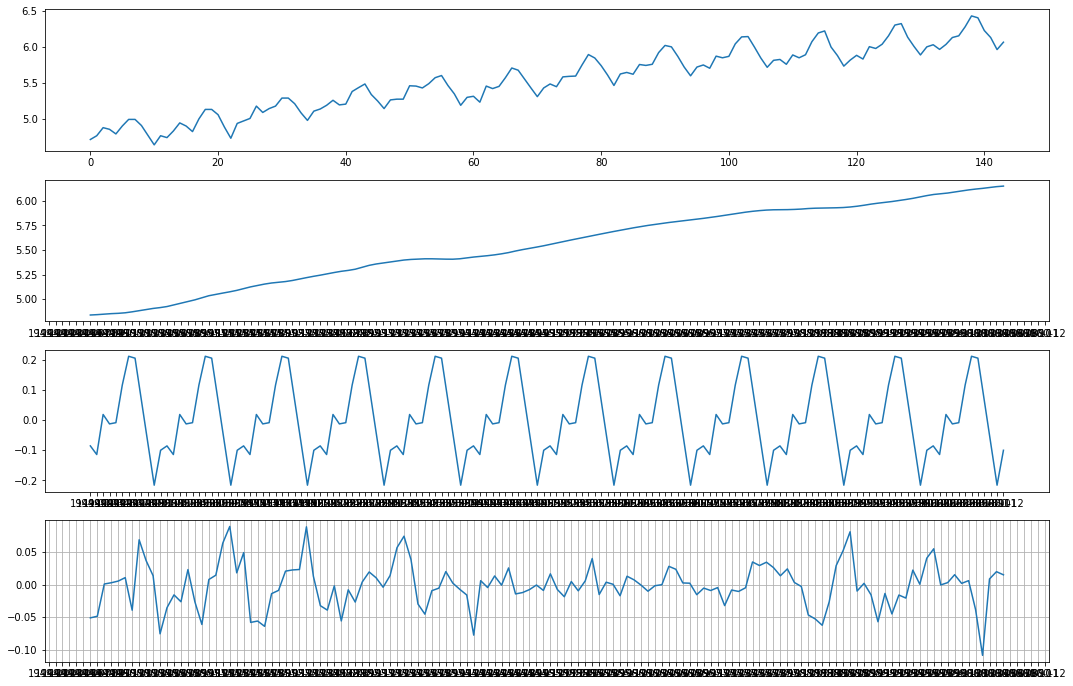

In [ ]:
result = seasonal_decompose(np.log(ts), model='additive', period =12)

fig, ax = plt.subplots(4,1, figsize = (18,12))
plt.subplot(4,1,1)
plt.plot(np.log(ts.values))
plt.subplot(4,1,2)
plt.plot(result.trend)
plt.subplot(4,1,3)
plt.plot(result.seasonal)
plt.subplot(4,1,4)
plt.plot(result.resid)
plt.grid()

In [ ]:
from statsmodels.tsa.seasonal import STL

In [ ]:
ts.asfreq('MS')

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Freq: MS, Length: 144, dtype: int64

In [ ]:
res = STL(ts, robust = True, period = 12).fit() 

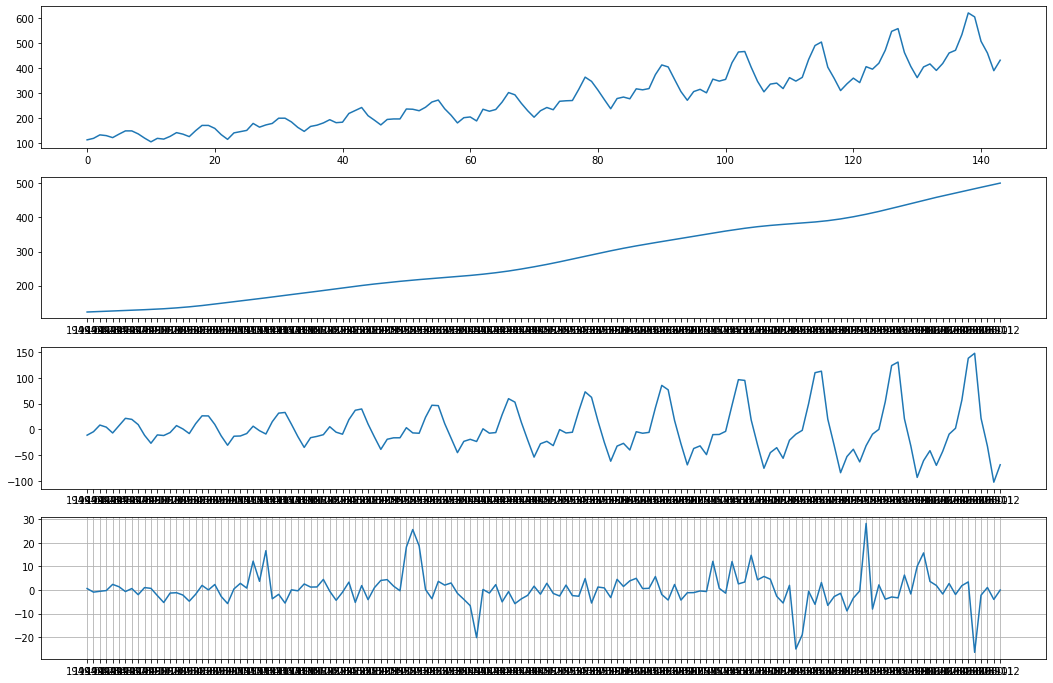

In [ ]:
fig, ax = plt.subplots(4,1, figsize = (18,12))
plt.subplot(4,1,1)
plt.plot(ts.values)
plt.subplot(4,1,2)
plt.plot(res.trend)
plt.subplot(4,1,3)
plt.plot(res.seasonal)
plt.subplot(4,1,4)
plt.plot(res.resid)
plt.grid()

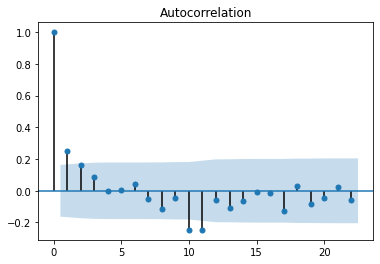

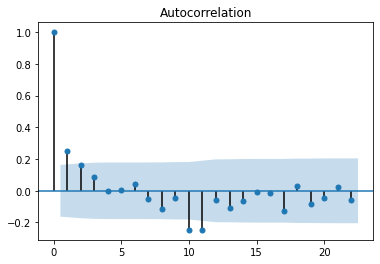

In [ ]:
smt.graphics.plot_acf(res.resid)

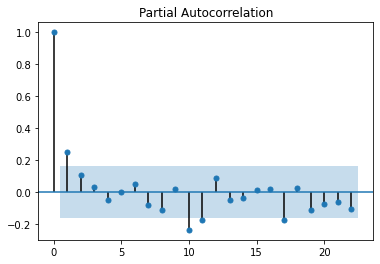

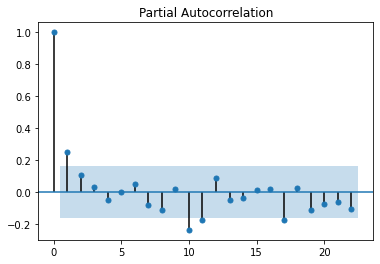

In [ ]:
smt.graphics.plot_pacf(res.resid)

In [ ]:
from scipy.fft import fft, ifft


In [ ]:
y = fft(ts.values)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


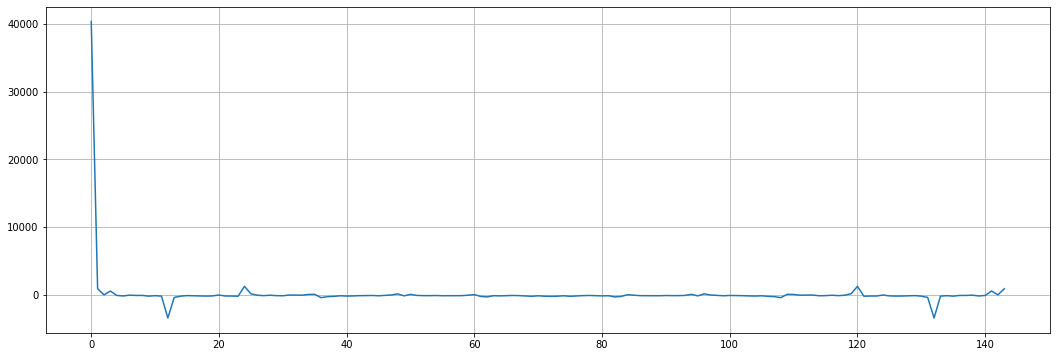

In [ ]:
fig,ax = plt.subplots(1,1, figsize= (18,6))
plt.plot(y)
plt.grid()